## Andrew Ingrassia
## World Happiness Report
## Unsupervised Machine Learning

***
### Contents

1. **Imports** <br><br>

2. **Elbow Technique** <br><br>

3. **K-Means Clustering** <br><br>

4. **Viewing the Scatterplots** <br><br>

5. **Calculating Descriptive Statistics for Each Cluster** <br><br>

6. **Identifying Countries Associated with Each Cluster** <br><br>

7. **Summary** <br><br>

8. **Exports**

***
### 1) Imports

In [32]:
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
import pylab as pl   
import matplotlib
import warnings
import sklearn
import os
import seaborn as sns

In [33]:
# Defines a path to WHR related data

path = r'C:\Users\ingra\OneDrive\Desktop\Data Analysis\World Happiness Report\WHR - Data'

In [34]:
# Imports combined WHR data and assigns it to the variable 'df'

df = pd.read_csv(os.path.join(path, 'whr_df_whr2.csv'))

In [35]:
# Imports the standardized version of 'df' and assigns it to the variable 'standardized_df'

standardized_df = pd.read_csv(os.path.join(path, 'standardized_df_whr4.csv'))

In [36]:
# Initialize Plotly for offline rendering

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [37]:
# Suppresses obnoxious warnings

warnings.filterwarnings("ignore")

In [38]:
df.head()

,country,year,happiness_rank,happiness_score,economic_status,economic_status_class,life_expectancy,life_expectancy_class,social_support,social_support_class,freedom,freedom_class,govt_trust,govt_trust_class,generosity,generosity_class
0,Switzerland,2015,1,7.587,1.397,Mid,0.941,High,1.350,High,0.666,High,0.420,Mid,0.297,Mid
1,Iceland,2015,2,7.561,1.302,Mid,0.948,High,1.402,High,0.629,High,0.141,Low,0.436,Mid
2,Denmark,2015,3,7.527,1.325,Mid,0.875,High,1.361,High,0.649,High,0.484,Mid,0.341,Mid
3,Norway,2015,4,7.522,1.459,Mid,0.885,High,1.331,High,0.670,High,0.365,Mid,0.347,Mid
4,Canada,2015,5,7.427,1.326,Mid,0.906,High,1.323,High,0.633,High,0.330,Mid,0.458,Mid


***
### 2A) Elbow Technique

In [39]:
# Defines the range of potential clusters within the data
num_cl = range(1, 11)

# Creates an empty list to store KMeans objects
kmeans = []

# Creates a KMeans object with the current number of clusters
# Appends KMeans objects to the list
for i in num_cl:
    kmeans_model = KMeans(n_clusters=i)
    kmeans.append(kmeans_model)

In [40]:
# Creates an empty list to store the kmeans scores
score = []

# Fits the KMeans model to the data and calculate the score
# Appends scores to the list
for i in range(len(kmeans)):
    kmeans_model = kmeans[i]
    kmeans_score = kmeans_model.fit(standardized_df).score(standardized_df)
    score.append(kmeans_score)

Text(0.5, 1.0, 'Elbow Plot')

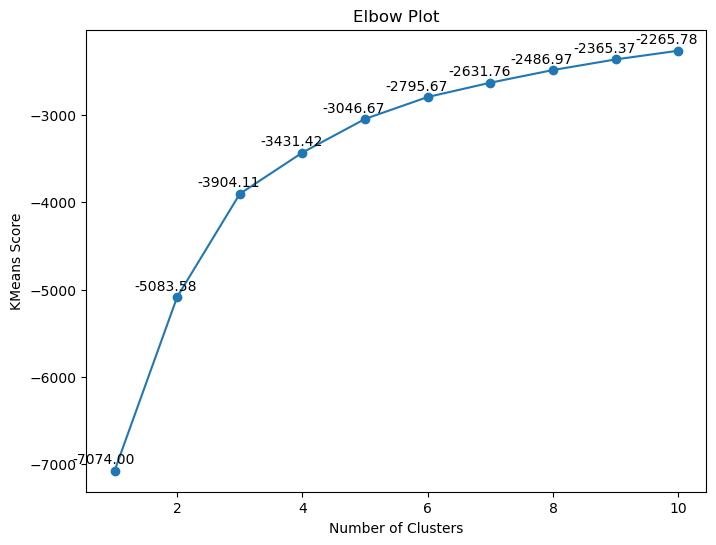

In [41]:
# Creates the elbow plot using pylab
pl.figure(figsize=(8, 6))
pl.plot(num_cl, score, marker='o')

# Add annotations to the dots
for i, txt in enumerate(score):
    pl.annotate(f'{txt:.2f}', (num_cl[i], score[i]), textcoords="offset points", xytext=(-8,5), ha='center')
    
# Adds axis labels and a plot title
pl.xlabel('Number of Clusters')
pl.ylabel('KMeans Score')
pl.title('Elbow Plot')

**Optimal number of clusters (elbow point) = 3**

***
### 3) K-Means Clustering

In [42]:
# Creates the k-means object
# Assigns the algorithm (with 3 clusters) to a new object called 'kmeans'

kmeans = KMeans(n_clusters = 3, random_state = 42)

In [43]:
# Fits/Applies the algorithm to the 'standardized_df' dataframe
# Creates the 3 clusters

kmeans.fit(standardized_df)

KMeans(n_clusters=3, random_state=42)

In [44]:
# Adds a new column to 'standardized_df' containing values that indicate the cluster assignment for each observation

standardized_df['cluster'] = kmeans.fit_predict(standardized_df)

In [45]:
# Views the new column

standardized_df.head()

,freedom,govt_trust,economic_status,social_support,life_expectancy,generosity,cluster
0,1.369377,2.591840,0.771454,0.876988,1.403226,0.917269,1
1,1.121938,0.110590,0.553005,1.038996,1.432864,2.151032,1
2,1.255689,3.161015,0.605892,0.911259,1.123779,1.307812,1
3,1.396127,2.102704,0.914020,0.817792,1.166120,1.361068,1
4,1.148688,1.791437,0.608192,0.792868,1.255035,2.346303,1


In [46]:
standardized_df['cluster'].value_counts()

cluster
0    608
2    362
1    209
Name: count, dtype: int64

In [47]:
# Adds a column to the 'standardized_df' dataframe containing happiness scores from the 'df' dataframe
standardized_df['happiness_score'] = df['happiness_score']

# Adds columns to the 'standardized_df' dataframe containing country names & years
standardized_df['country'] = df['country']
standardized_df['year'] = df['year']

In [48]:
# Groups 'standardized_df' by 'year' and 'cluster' and calculates the average happiness score
cluster_year_avg_happiness = standardized_df.groupby(['year', 'cluster'])['happiness_score'].mean()

# Resets the index to convert the grouped data back into a dataframe
cluster_year_avg_happiness = cluster_year_avg_happiness.reset_index()

# Renames the calculated column to 'avg_happiness_score'
cluster_year_avg_happiness.rename(columns={'happiness_score': 'avg_happiness_score'}, inplace=True)

# Merges the calculated data back into the 'standardized_df' dataframe
standardized_df = pd.merge(standardized_df, cluster_year_avg_happiness, on=['year', 'cluster'])

In [49]:
# Reorders the columns in 'standardized_df'

new_column_order = ['happiness_score', 'freedom', 'govt_trust', 'economic_status', 'social_support', 'life_expectancy', 'generosity', 'country', 'year', 'cluster', 'avg_happiness_score']
standardized_df = standardized_df[new_column_order]

In [50]:
# Views the 'standardized_df' dataframe

standardized_df.head()

,happiness_score,freedom,govt_trust,economic_status,social_support,life_expectancy,generosity,country,year,cluster,avg_happiness_score
0,7.587,1.369377,2.591840,0.771454,0.876988,1.403226,0.917269,Switzerland,2015,1,6.93916
1,7.561,1.121938,0.110590,0.553005,1.038996,1.432864,2.151032,Iceland,2015,1,6.93916
2,7.527,1.255689,3.161015,0.605892,0.911259,1.123779,1.307812,Denmark,2015,1,6.93916
3,7.522,1.396127,2.102704,0.914020,0.817792,1.166120,1.361068,Norway,2015,1,6.93916
4,7.427,1.148688,1.791437,0.608192,0.792868,1.255035,2.346303,Canada,2015,1,6.93916


***
### 4) Viewing the Scatterplots

**Note:** These scatterplots visualize the relationship between each key variable and the associated country/year combination's happiness score for each cluster

### *Freedom vs Average Happiness Score*

In [51]:
# Creates the Plotly figure
fig_1 = go.Figure()

# Loops through the clusters and add traces
for cluster_num in range(3):
    cluster_data = standardized_df[standardized_df['cluster'] == cluster_num]
    
    # Defines how the hover text is displayed
    hover_text = (cluster_data['country'] + ', ' + cluster_data['year'].astype(str))
    
    # Adds scatter trace for each cluster
    fig_1.add_trace(
        go.Scatter(
            x=cluster_data['freedom'],
            y=cluster_data['avg_happiness_score'],
            mode='markers',
            name=f'Cluster {cluster_num}',
            hoverinfo='text',  # Sets hoverinfo to 'text' to only display custom hover text
            text=hover_text,   # Uses the 'text' parameter instead of 'hovertext'
            marker=dict(size=6)
        )
    )

# Customizes the plot layout
fig_1.update_layout(
    xaxis_title='Freedom',
    yaxis_title='Average Happiness Score',
    title='Freedom vs Average Happiness Score',
    showlegend=True,
    legend=dict(
        x=1,
        y=1,
        itemsizing='constant',
    )
)

### *Government Trust vs Average Happiness Score*

In [52]:
# Creates the Plotly figure
fig_2 = go.Figure()

# Loops through the clusters and add traces
for cluster_num in range(3):
    cluster_data = standardized_df[standardized_df['cluster'] == cluster_num]
    
    # Defines how the hover text is displayed
    hover_text = (cluster_data['country'] + ', ' + cluster_data['year'].astype(str))
    
    # Adds scatter trace for each cluster
    fig_2.add_trace(
        go.Scatter(
            x=cluster_data['govt_trust'],
            y=cluster_data['avg_happiness_score'],
            mode='markers',
            name=f'Cluster {cluster_num}',
            hoverinfo='text',  # Sets hoverinfo to 'text' to only display custom hover text
            text=hover_text,   # Uses the 'text' parameter instead of 'hovertext'
            marker=dict(size=6)
        )
    )

# Customizes the plot layout
fig_2.update_layout(
    xaxis_title='Government Trust',
    yaxis_title='Average Happiness Score',
    title='Government Trust vs Average Happiness Score',
    showlegend=True,
    legend=dict(
        x=1,
        y=1,
        itemsizing='constant',
    )
)

### *Economic Status vs Average Happiness Score*

In [53]:
# Creates the Plotly figure
fig_3 = go.Figure()

# Loops through the clusters and add traces
for cluster_num in range(3):
    cluster_data = standardized_df[standardized_df['cluster'] == cluster_num]
    
    # Defines how the hover text is displayed
    hover_text = (cluster_data['country'] + ', ' + cluster_data['year'].astype(str))
    
    # Adds scatter trace for each cluster
    fig_3.add_trace(
        go.Scatter(
            x=cluster_data['economic_status'],
            y=cluster_data['avg_happiness_score'],
            mode='markers',
            name=f'Cluster {cluster_num}',
            hoverinfo='text',  # Sets hoverinfo to 'text' to only display custom hover text
            text=hover_text,   # Uses the 'text' parameter instead of 'hovertext'
            marker=dict(size=6)
        )
    )

# Customizes the plot layout
fig_3.update_layout(
    xaxis_title='Economic Status',
    yaxis_title='Average Happiness Score',
    title='Economic Status vs Average Happiness Score',
    showlegend=True,
    legend=dict(
        x=1,
        y=1,
        itemsizing='constant',
    )
)

### *Social Support vs Average Happiness Score*

In [54]:
# Creates the Plotly figure
fig_4 = go.Figure()

# Loops through the clusters and add traces
for cluster_num in range(3):
    cluster_data = standardized_df[standardized_df['cluster'] == cluster_num]
    
    # Defines how the hover text is displayed
    hover_text = (cluster_data['country'] + ', ' + cluster_data['year'].astype(str))
    
    # Adds scatter trace for each cluster
    fig_4.add_trace(
        go.Scatter(
            x=cluster_data['social_support'],
            y=cluster_data['avg_happiness_score'],
            mode='markers',
            name=f'Cluster {cluster_num}',
            hoverinfo='text',  # Sets hoverinfo to 'text' to only display custom hover text
            text=hover_text,   # Uses the 'text' parameter instead of 'hovertext'
            marker=dict(size=6)
        )
    )

# Customizes the plot layout
fig_4.update_layout(
    xaxis_title='Social Support',
    yaxis_title='Average Happiness Score',
    title='Social Support vs Average Happiness Score',
    showlegend=True,
    legend=dict(
        x=1,
        y=1,
        itemsizing='constant',
    )
)

### *Life Expectancy vs Average Happiness Score*

In [55]:
# Creates the Plotly figure
fig_5 = go.Figure()

# Loops through the clusters and add traces
for cluster_num in range(3):
    cluster_data = standardized_df[standardized_df['cluster'] == cluster_num]
    
    # Defines how the hover text is displayed
    hover_text = (cluster_data['country'] + ', ' + cluster_data['year'].astype(str))
    
    # Adds scatter trace for each cluster
    fig_5.add_trace(
        go.Scatter(
            x=cluster_data['life_expectancy'],
            y=cluster_data['avg_happiness_score'],
            mode='markers',
            name=f'Cluster {cluster_num}',
            hoverinfo='text',  # Sets hoverinfo to 'text' to only display custom hover text
            text=hover_text,   # Uses the 'text' parameter instead of 'hovertext'
            marker=dict(size=6)
        )
    )

# Customizes the plot layout
fig_5.update_layout(
    xaxis_title='Life Expectancy',
    yaxis_title='Average Happiness Score',
    title='Life Expectancy vs Average Happiness Score',
    showlegend=True,
    legend=dict(
        x=1,
        y=1,
        itemsizing='constant',
    )
)

### *Generosity vs Average Happiness Score*

In [56]:
# Creates the Plotly figure
fig_6 = go.Figure()

# Loops through the clusters and add traces
for cluster_num in range(3):
    cluster_data = standardized_df[standardized_df['cluster'] == cluster_num]
    
    # Defines how the hover text is displayed
    hover_text = (cluster_data['country'] + ', ' + cluster_data['year'].astype(str))
    
    # Adds scatter trace for each cluster
    fig_6.add_trace(
        go.Scatter(
            x=cluster_data['generosity'],
            y=cluster_data['avg_happiness_score'],
            mode='markers',
            name=f'Cluster {cluster_num}',
            hoverinfo='text',  # Sets hoverinfo to 'text' to only display custom hover text
            text=hover_text,   # Uses the 'text' parameter instead of 'hovertext'
            marker=dict(size=6)
        )
    )

# Customizes the plot layout
fig_6.update_layout(
    xaxis_title='Generosity',
    yaxis_title='Average Happiness Score',
    title='Generosity vs Average Happiness Score',
    showlegend=True,
    legend=dict(
        x=1,
        y=1,
        itemsizing='constant',
    )
)

***
### 5) Calculating Descriptive Statistics for Each Cluster

In [57]:
# Define the columns you want to calculate mean and median for
columns_to_aggregate = ['freedom', 'govt_trust', 'economic_status', 'social_support', 'life_expectancy', 'generosity']

# Group the data by the 'clusters' column and calculate mean and median for the specified columns
cluster_stats = standardized_df.groupby('cluster')[columns_to_aggregate].agg(['mean', 'median'])

# Create a new dataframe to store the cluster statistics
df_stats = pd.DataFrame(cluster_stats)

In [58]:
# Views the new dataframe

df_stats

freedom           govt_trust           economic_status            \
             mean    median       mean    median            mean    median   
cluster                                                                      
0       -0.059267  0.061966  -0.396727 -0.494159        0.259520  0.219582   
1        1.029369  1.048375   1.705567  1.684716        1.022744  0.897924   
2       -0.494761 -0.372723  -0.318380 -0.387439       -1.026359 -1.066968   

        social_support           life_expectancy           generosity  \
                  mean    median            mean    median       mean   
cluster                                                                 
0             0.326581  0.403425        0.320872  0.357419  -0.465795   
1             0.792272  0.867641        0.844677  0.878205   0.879854   
2            -1.005929 -0.934702       -1.026597 -1.065218   0.274348   

                   
           median  
cluster            
0       -0.609402  
1        0.730873  
2        0.122867

In [59]:
df_stats.dtypes

freedom          mean      float64
                 median    float64
govt_trust       mean      float64
                 median    float64
economic_status  mean      float64
                 median    float64
social_support   mean      float64
                 median    float64
life_expectancy  mean      float64
                 median    float64
generosity       mean      float64
                 median    float64
dtype: object

### 6) Identifying the Country/Year Combinations Associated with Each Cluster

In [60]:
df_clusters = standardized_df[['cluster', 'country', 'year', 'avg_happiness_score']]

In [61]:
df_clusters.head()

,cluster,country,year,avg_happiness_score
0,1,Switzerland,2015,6.93916
1,1,Iceland,2015,6.93916
2,1,Denmark,2015,6.93916
3,1,Norway,2015,6.93916
4,1,Canada,2015,6.93916


***
### 7) Summary

### *Process*

I employed the k-means clustering technique to categorize countries into distinct clusters based on their similarity with respect to key variables contributing to happiness scores. The analysis began with standardizing the dataset and determining the optimal number of clusters using the elbow method. After applying k-means clustering with three clusters, I created scatterplots to visualize the outcomes. Each scatterplot showcased the relationship between specific key variables—such as freedom, government trust, economic status, social support, life expectancy, and generosity—and the average happiness scores within individual clusters for each year. By plotting these dynamic relationships, I gained insights into the distribution of countries across clusters and the diverse impacts of these variables on happiness scores over time. This exploratory visualization offered profound insights into the interplay of different factors that shape overall happiness within distinct groups of countries across the years.

### *Interpretation of cluster statistics*

**Cluster 0 | Medium**

- **Freedom**: *The mean and median values are close to 0, suggesting that the level of freedom is moderate in this cluster.*
- **Government Trust**: *Both the mean and median values are negative, indicating that trust in government tends to be lower in these countries.*
- **Economic Status**: *Both the mean and median values are negative, suggesting that this cluster includes countries with lower economic conditions.*
- **Social Support**: *Both the mean and median values are positive but not as high as Cluster 0, indicating that social support varies but is generally moderate.*
- **Life Expectancy**: *The mean and median values are positive, indicating that countries in this cluster tend to have moderate to high life expectancies.*
- **Generosity**: *The mean and median values are negative, indicating that generosity tends to be lower in this cluster.*

**Cluster 1 | High**

- **Freedom**: *The mean and median values are both around 1, which suggests that the countries in this cluster generally have high levels of freedom.*
- **Government Trust**: *Both the mean and median values are above 1.6, indicating that these countries tend to have high levels of trust in their government.*
- **Economic Status**: *The mean and median values are both above 0.8, suggesting that this cluster includes countries with relatively strong economic conditions.*
- **Social Support**: *Both the mean and median values are around 0.8, indicating that these countries have good levels of social support.*
- **Life Expectancy**: *The mean and median values are both close to 0.85, suggesting that countries in this cluster generally have high life expectancies.*
- **Generosity**: *Both the mean and median values are above 0.7, indicating that these countries tend to exhibit generosity.*

**Cluster 2 | Low**

- **Freedom**: *The mean and median values are negative, indicating that countries in this cluster have lower levels of freedom on average.*
- **Government Trust**: *Both the mean and median values are negative, suggesting that trust in government is generally low in these countries.*
- **Economic Status**: *Both the mean and median values are negative, indicating that this cluster includes countries with lower economic conditions.*
- **Social Support**: *Both the mean and median values are negative, suggesting that social support is relatively low in these countries.*
- **Life Expectancy**: *The mean and median values are negative, indicating that life expectancy tends to be lower in this cluster.*
- **Generosity**: *The mean and median values are positive but lower compared to Cluster 0 and 2, suggesting that generosity varies but is generally not as high.*

Overall, the statistics reveal distinct patterns in each cluster's characteristics. Cluster 1 seems to represent countries with higher levels of freedom, trust in government, economic status, social support, life expectancy, and generosity. Cluster 2 includes countries with lower values in these areas, while Cluster 1 falls somewhere in between. These patterns can provide insights into the characteristics that differentiate these clusters and contribute to their average happiness scores.

### Future Steps

I would like to translate the cluster assignments I obtained into a visualization. My idea is to create a world map where each country is shaded based on the cluster it belongs to. This geographical representation could potentially unveil some interesting regional patterns. I am also interested in examining how these cluster assignments change over time, assuming they do at all. By merging the temporal dimension with the spatial representation, I hope to gain a deeper understanding of the distribution and dynamics of clusters, helping bridge the gap between the data's abstract structure and its real-world implications.

***
### 8) Exports

In [221]:
# Exports the modified 'standardized_df' dataframe

# standardized_df.to_csv(r'C:\Users\ingra\OneDrive\Desktop\standardized_df_modified_whr5.csv', index=False)

In [222]:
# Exports the 'df_clusters' dataframe
 
# df_clusters.to_csv(r'C:\Users\ingra\OneDrive\Desktop\df_clusters_whr5.csv', index=False)

In [223]:
# Exports the 'df_stats' dataframe

# df_stats.to_csv(r'C:\Users\ingra\OneDrive\Desktop\df_stats_whr5.csv', index=False)